### Import Libraries and Load the datasets

In [1]:
# Import the required Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

# Load the dataset
df = pd.read_csv('/kaggle/input/world-happiness/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [3]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


## Data Cleaning

In [4]:
#Check for duplicates
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [5]:
# Check for duplicates
df.duplicated().sum()

0

## EDA

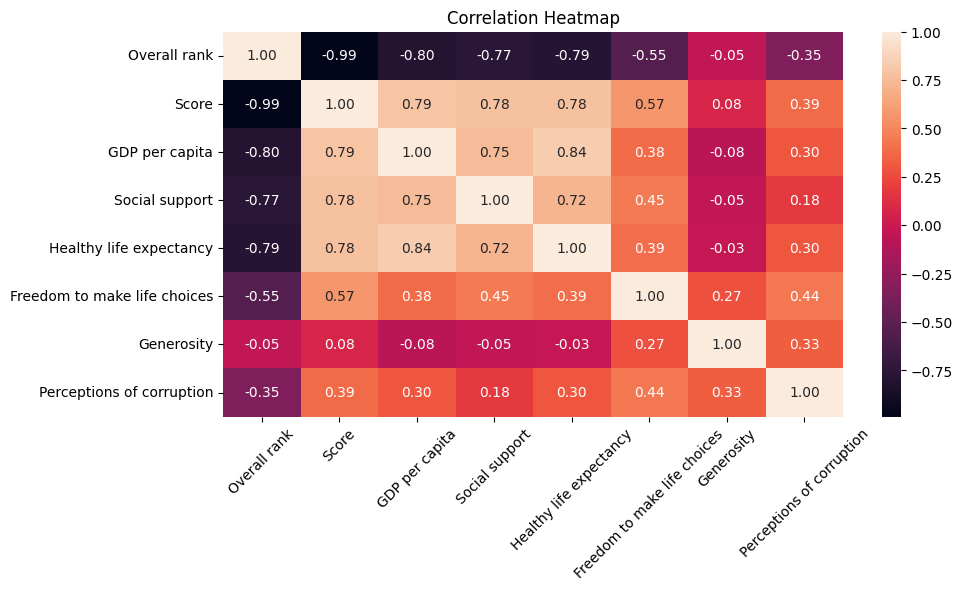

In [6]:
# Correlation Heatmap
df_num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10,5))
sns.heatmap(df_num.corr(),annot=True,fmt=".2f")
plt.xticks(rotation=45)
plt.title("Correlation Heatmap")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


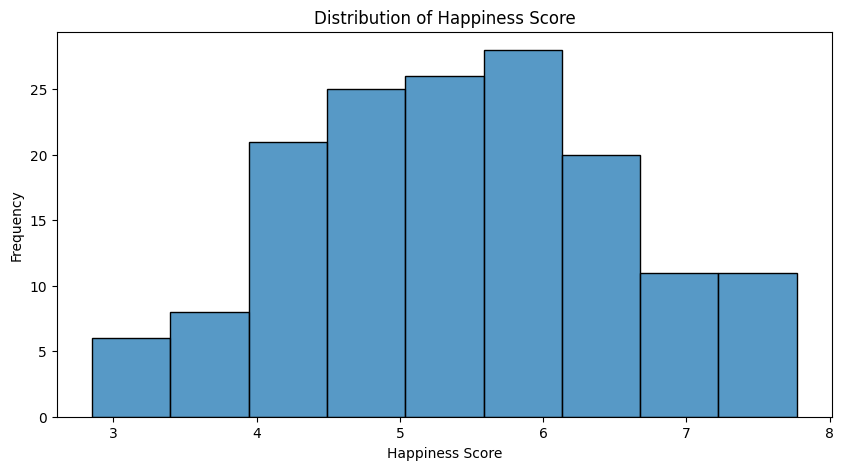

In [7]:
# Distribution of Happiness Score
plt.figure(figsize=(10, 5))
sns.histplot(df['Score'])
plt.title('Distribution of Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

**Distribution of Happiness Scores**:

The histogram reveals that a happiness score of approximately 6 is the most frequently observed value among the countries analyzed.

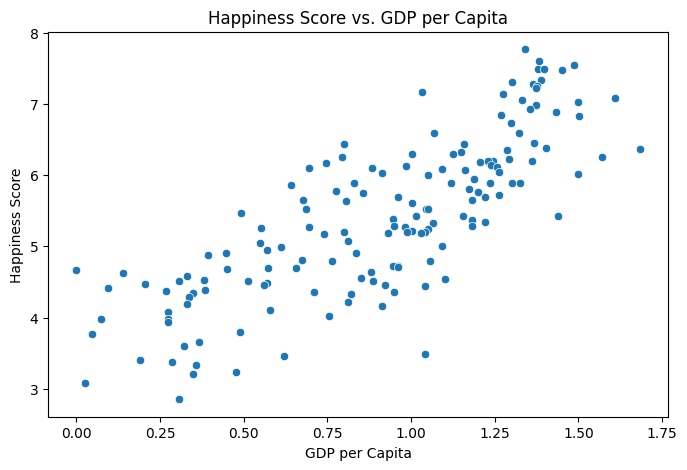

In [8]:
# Relation between GDA per capita vs. Happiness Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDP per capita', y='Score', data=df)
plt.title('Happiness Score vs. GDP per Capita')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

**Impact of GDP per Capita on Happiness**:

The scatter plot indicates a positive correlation between GDP per capita and happiness score, suggesting that as a region's economic prosperity increases, its happiness score tends to rise.

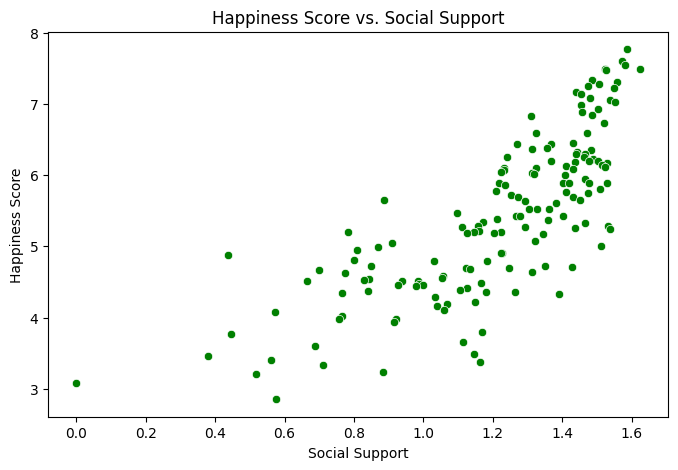

In [9]:
# Relation between Social Support and Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Social support', y='Score', data=df, color='green')
plt.title('Happiness Score vs. Social Support')
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.show()

**Impact of Social Support on Happiness**:

Regions with higher levels of social support generally report higher happiness scores, highlighting the importance of strong social networks.

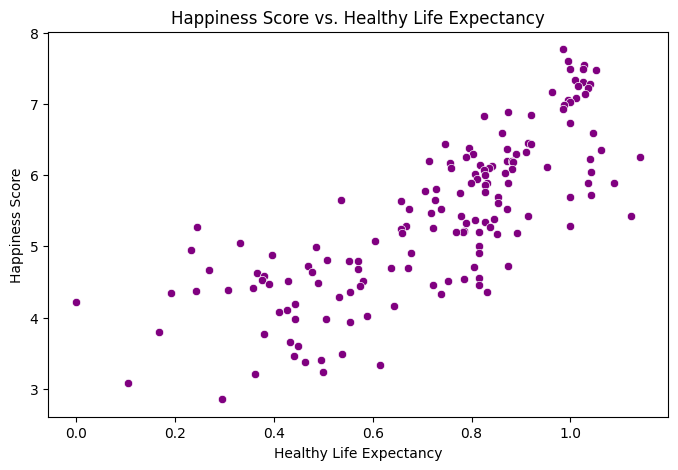

In [10]:
# Relation between Health life expectancy and Score
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Healthy life expectancy', y='Score', data=df, color='purple')
plt.title('Happiness Score vs. Healthy Life Expectancy')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Score')
plt.show()

**Impact of Healthy Life Expectancy on Happiness**:

An increase in healthy life expectancy is associated with higher happiness scores, emphasizing the role of healthcare and longevity in overall well-being.

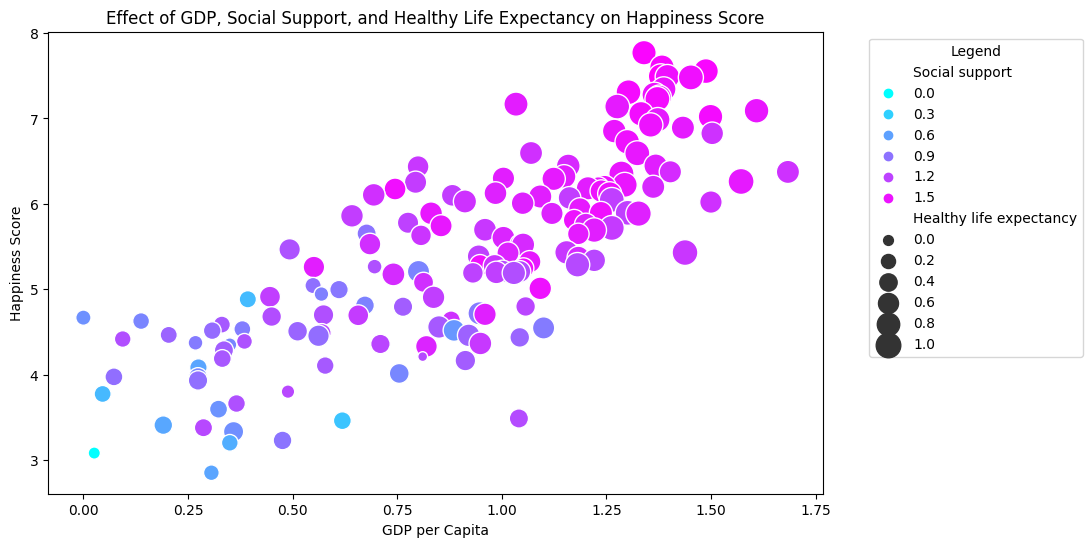

In [11]:
# How GDA per captia, Social Support and Health life expectancy effect the score together
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita', y='Score', hue='Social support', size='Healthy life expectancy', data=df, palette='cool', sizes=(50, 350))
plt.title('Effect of GDP, Social Support, and Healthy Life Expectancy on Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Combined Effects of Key Variables**:

Regions that rank high in GDP per capita, social support, and healthy life expectancy consistently achieve the highest happiness scores. This underscores the multifaceted nature of happiness and the interplay between economic, social, and health factors.

In [12]:
# Map with Happiness scores for each region
if 'Country or region' in df.columns:
    fig = px.choropleth(df, 
                        locations="Country or region", 
                        locationmode="country names", 
                        color="Score", 
                        title="World Happiness Scores by Country", 
                        color_continuous_scale=px.colors.sequential.Viridis)
    fig.show()

**Regional Differences in Happiness**:

The map visualization highlights stark regional disparities in happiness scores. Many countries in `Asia` and `Africa` tend to have `lower` happiness scores, whereas regions like `Australia`, `North America`, and `South America` exhibit `higher` happiness levels.
